Датасет №4
Heart Disease Dataset (kaggle.com)
https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

### Импорт библиотек и открытие датасета

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
import sys
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
sys.path
%matplotlib inline  

In [3]:
data =pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### Приступим к разведочному анализу. Для начала проверим датасет на корректность данных.

In [4]:
# первые пять строк датасета
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
#информация о датасете
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
#проверим на пропуски еще раз
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Описание датасета показало отсутствие пропусков а также тип данных 14 столбцов. Общее количество записей 1024. <br>Описание столбцов


<br>1.age - возраст
<br>2.sex - пол
<br>3.chest pain type (4 values) - тип боли в груди
<br>4.resting blood pressure - артериальное давление в состоянии покоя
<br>5.serum cholestoral in mg/dl -  уровень холестерина в сыворотке крови натощак, мг/дл
<br>6.fasting blood sugar > 120 mg/dl - уровень сахара в крови натощак > 120 мг/дл
<br>7.resting electrocardiographic results (values 0,1,2) - результаты электрокардиографии в состоянии покоя (значения 0,1,2)
<br>8.maximum heart rate achieved - достигнута максимальная частота сердечных сокращений
<br>9.exercise induced angina -стенокардия, вызванная физической нагрузкой
<br>10.oldpeak = ST depression induced by exercise relative to rest - олдпик = депрессия ST, вызванная физической нагрузкой по сравнению с отдыхом.
<br>11.the slope of the peak exercise ST segment - наклон сегмента ST пикового упражнения
<br>12.number of major vessels (0-3) colored by flourosopy - количество крупных сосудов (0-3), окрашенных методом флуороскопии
<br>13.thal: 0 = normal; 1 = fixed defect; 2 = reversable defect -флуороскопии: 0 = нормальный; 1 = фиксированный дефект; 2 = обратимый дефект
<br>14. target - цель(0-1), целевая переменная, на наличие или отсутствие сердечный заболеваний

In [7]:
data.describe()
#Статистические данные 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Разведочный анализ

Проанализируем целевую переменную

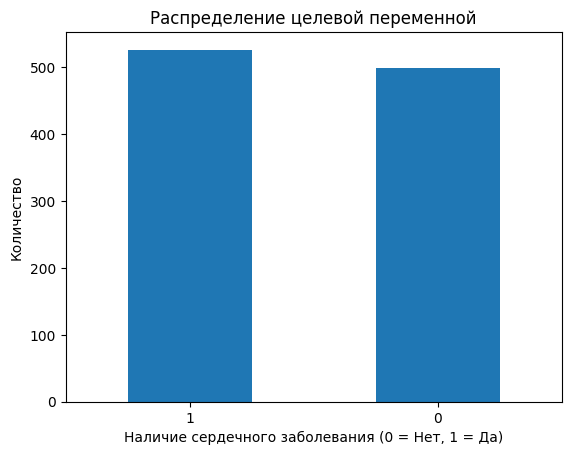

In [8]:

target_count = data['target'].value_counts()
plt.figure()
target_count.plot(kind='bar')
plt.title('Распределение целевой переменной')
plt.xlabel('Наличие сердечного заболевания (0 = Нет, 1 = Да)')
plt.ylabel('Количество')
plt.xticks(rotation=0)
plt.show()

*Отсюда вывод что количество заболевших ненамного больше, чем здоровых.*

Создадим диаграмму распределения заболеваний по полу.

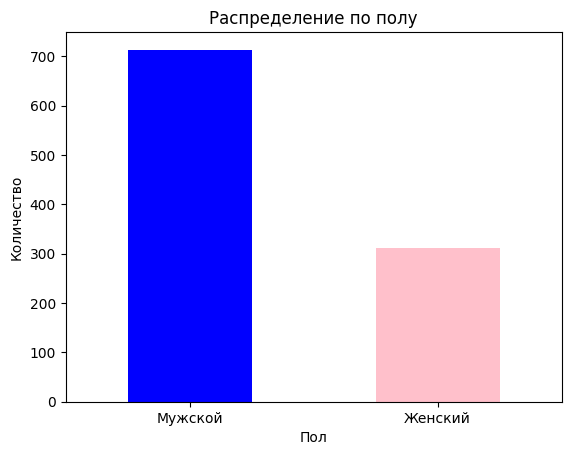

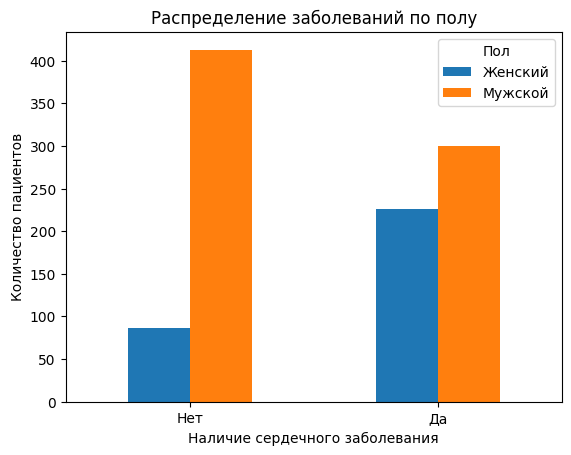

In [9]:
sex_counts = data['sex'].value_counts()


sex_counts.plot(kind='bar', color=['blue', 'pink'])

plt.title('Распределение по полу')
plt.xlabel('Пол')
plt.ylabel('Количество')
plt.xticks(ticks=[0, 1], labels=['Мужской', 'Женский'], rotation=0)

plt.show()
pd.crosstab(data.target, data.sex).plot(kind ="bar")
plt.title('Распределение заболеваний по полу')
plt.xlabel('Наличие сердечного заболевания')
plt.ylabel('Количество пациентов')
plt.xticks(ticks=[0, 1], labels=['Нет', 'Да'], rotation=0)
plt.legend(title='Пол', labels=['Женский', 'Мужской'])
plt.show()

*Можно сделать вывод, что в исследовании мужчин принимает участие в более чем два раза больше чем женщин. Также больных женщин больше в 2.5 раза чем здоровых, а здоровых мужчин наоборот больше чем больных*

Создадим диаграмму распределения людей по возрасту

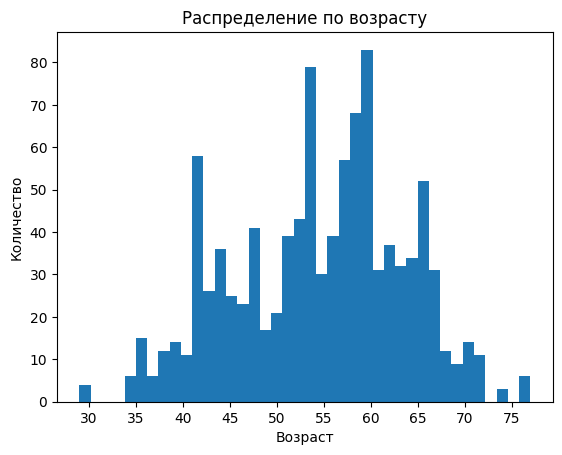

In [10]:

data['age'].plot(kind='hist', bins=40)

plt.title('Распределение по возрасту')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.xticks(range(30, 80, 5))
plt.show()


Создадим диаграмму зависимости заболеваний от возраста

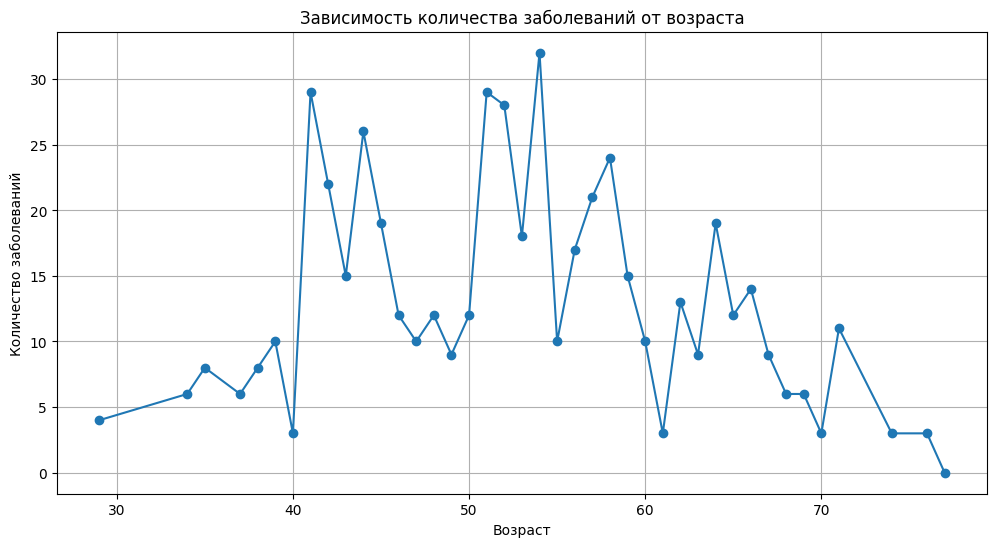

In [11]:
# Группировка данных по возрасту и подсчет количества заболеваний в каждой возрастной группе
age_target_counts = data.groupby('age')['target'].sum()

# Построение графика зависимости количества заболеваний от возраста
plt.figure(figsize=(12, 6))
plt.plot(age_target_counts.index, age_target_counts.values, marker='o', linestyle='-')
plt.title('Зависимость количества заболеваний от возраста')
plt.xlabel('Возраст')
plt.ylabel('Количество заболеваний')
plt.xticks(rotation=0)
plt.grid(True)  # Включение сетки для лучшей визуализации
plt.show()

*По данной диаграмме зависимость не прослеживается, только то, что в диапазоне 50-60 лет больше всего заболеваний, но и количество людей, участвующих в исследовании в данном диапазоне, больше чем в других.*

Диаграмма зависимости уровня холестерина от возраста.

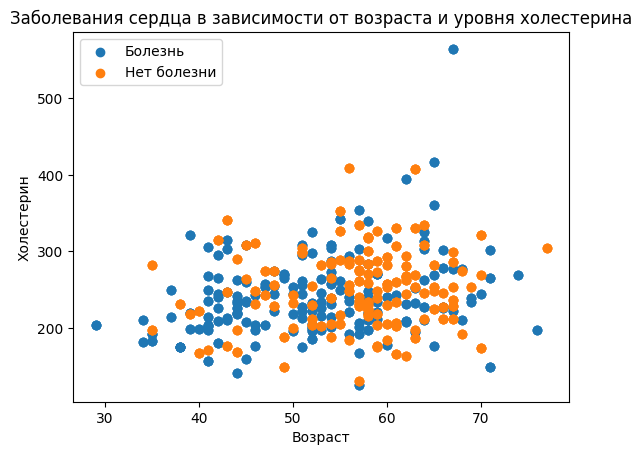

In [12]:
plt.scatter(data.age[data.target == 1],
           data.chol[data.target ==1])

plt.scatter(data.age[data.target==0],
           data.chol[data.target==0],)

plt.xlabel("Возраст")
plt.ylabel("Холестерин")
plt.legend(["Болезнь", "Нет болезни"])
plt.title("Заболевания сердца в зависимости от возраста и уровня холестерина")
plt.xticks(rotation = 0)
plt.show()

*По данной статистике можно отметить, что у больных людей уровень холестерина в среднем ниже чем у здоровых людей, а также есть аномальное значение с предельно высоким значением холестерина.*

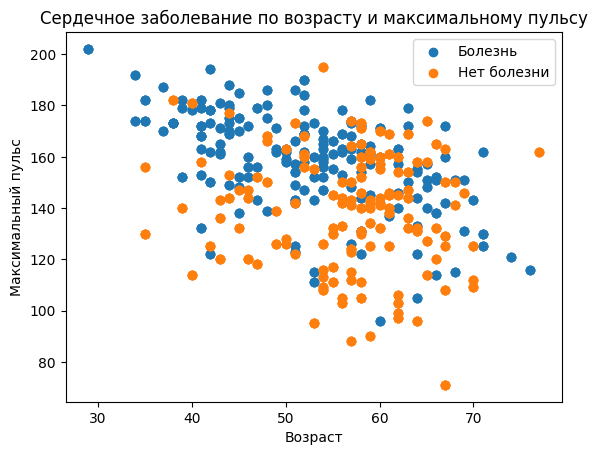

In [13]:

plt.scatter(data.age[data.target == 1], data.thalach[data.target == 1])
plt.scatter(data.age[data.target == 0], data.thalach[data.target == 0])
plt.xlabel("Возраст")
plt.ylabel("Максимальный пульс")
plt.legend(["Болезнь", "Нет болезни"])
plt.title("Сердечное заболевание по возрасту и максимальному пульсу")
plt.xticks(rotation=0)
plt.show()

*Отсюда можно сделать вывод, что у людей с сердечными болезнями средний пульс выше среднего пульса здоровых людей.*

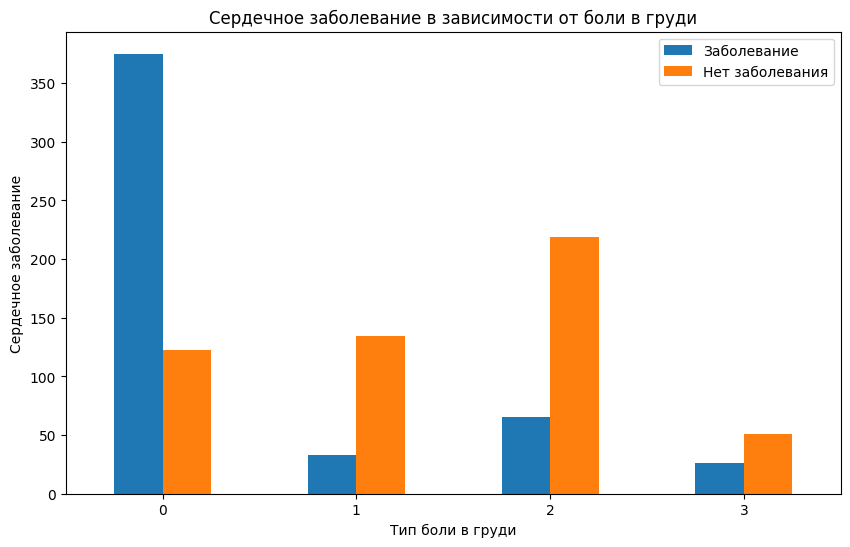

In [14]:
pd.crosstab(data.cp, data.target).plot(kind="bar", figsize=(10, 6))

plt.title("Сердечное заболевание в зависимости от боли в груди")
plt.xlabel("Тип боли в груди")
plt.ylabel("Сердечное заболевание")
plt.legend(["Заболевание", "Нет заболевания"])
plt.xticks(rotation=0)
plt.show()


*Можно наблюдать, что у больных людей в большинстве нулевой тип боли, а у здоровых людей преобладает второй тип боли.*

### Матрица корреляции

cor_matrix = data.corr()
cor_matrix

In [15]:
cor_matrix = data.corr()
cor_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


<Axes: >

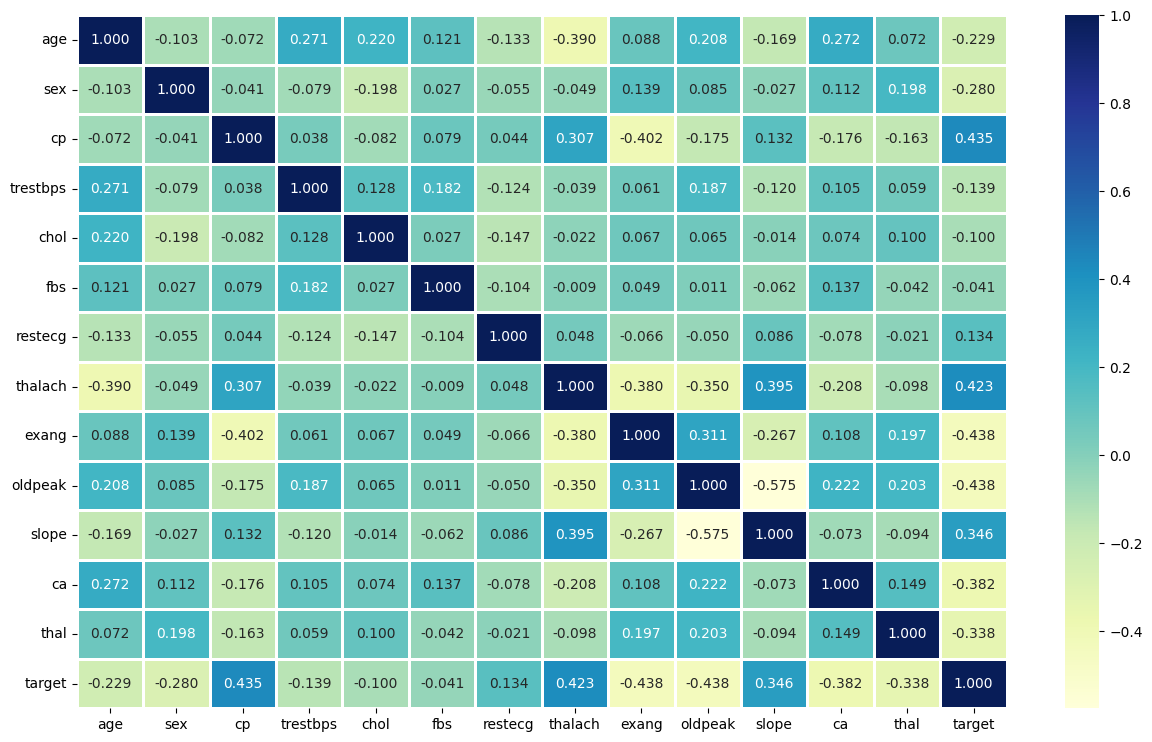

In [16]:
cor_matrix = data.corr()
plt.figure(figsize = (15,9))
sns.heatmap(cor_matrix, 
           annot = True,
           linewidth = 1,
            fmt= ".3f", 
            cmap="YlGnBu"
           )

### KNN


In [17]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = data.drop('target', axis=1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

k = 5 # гиперпараметр K
knn = KNeighborsClassifier(n_neighbors=k)

# Обучаем модель на обучающем наборе
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

#  качество модели
accuracy = accuracy_score(y_test, y_pred)
print("Точность модели (Accuracy):", accuracy)

print("\nОтчет о классификации:")
print(classification_report(y_test, y_pred))


Точность модели (Accuracy): 0.7317073170731707

Отчет о классификации:
              precision    recall  f1-score   support

           0       0.73      0.73      0.73       102
           1       0.73      0.74      0.73       103

    accuracy                           0.73       205
   macro avg       0.73      0.73      0.73       205
weighted avg       0.73      0.73      0.73       205



GridSearch

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Определение диапазона значений гиперпараметра K для GridSearchCV
k_values = list(range(1, 31))
# Создание экземпляра объекта KNeighborsClassifier
knn1 = KNeighborsClassifier()
# Создание словаря параметров для поиска
param_grid = {'n_neighbors': k_values}
# Создание экземпляра объекта GridSearchCV
grid_search = GridSearchCV(knn1, param_grid, cv=5)
# Обучение GridSearchCV на обучающем наборе данных
grid_search.fit(X_train, y_train)
# Определение оптимального значения гиперпараметра и качества модели
best_k = grid_search.best_params_['n_neighbors']
best_score = grid_search.best_score_

print("Лучшее значение гиперпараметра (GridSearchCV):", best_k)
print("Лучшее качество модели (GridSearchCV):", best_score)


Лучшее значение гиперпараметра (GridSearchCV): 1
Лучшее качество модели (GridSearchCV): 0.9719512195121951


RandomSearch

In [19]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
k_values2 = list(range(1, 31))
knn2 = KNeighborsClassifier()
# Создание словаря параметров для поиска
param_dist = {'n_neighbors': randint(1, 31)}
# Создание экземпляра объекта RandomizedSearchCV
random_search = RandomizedSearchCV(knn2, param_distributions=param_dist, n_iter=10, cv=5)
# Обучение RandomizedSearchCV на обучающем наборе данных
random_search.fit(X_train, y_train)
# Определение оптимального значения гиперпараметра и качества модели
best_k_random = random_search.best_params_['n_neighbors']
best_score_random = random_search.best_score_
print("Лучшее значение гиперпараметра (RandomizedSearchCV):", best_k_random)
print("Лучшее качество модели (RandomizedSearchCV):", best_score_random)


Лучшее значение гиперпараметра (RandomizedSearchCV): 15
Лучшее качество модели (RandomizedSearchCV): 0.723170731707317


Кросс валидация

In [20]:
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold

# Создание экземпляра объекта KNeighborsClassifier с оптимальным значением гиперпараметра K
optimal_knn = KNeighborsClassifier(n_neighbors=best_k_random)

# Оценка качества модели с использованием стратегии KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_kf = cross_val_score(optimal_knn, X_train, y_train, cv=kf)
print("Средняя точность модели с использованием KFold:", cv_scores_kf.mean())
# Оценка качества модели с использованием стратегии StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_skf = cross_val_score(optimal_knn, X_train, y_train, cv=skf)
print("Средняя точность модели с использованием StratifiedKFold:", cv_scores_skf.mean())


Средняя точность модели с использованием KFold: 0.6975609756097562
Средняя точность модели с использованием StratifiedKFold: 0.7158536585365853


### Лаб №4

In [21]:
print (data.head)

<bound method NDFrame.head of       age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2  

обучающая и тестовая выборка

In [22]:

# Определение признаков (X) и целевой переменной (y)
X = data.drop('target', axis=1)
y = data['target']

# Разделение выборки на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Логистическая регрессия 

In [23]:
from sklearn.linear_model import LogisticRegression

# Инициализируем модель логистической регрессии
logreg = LogisticRegression(max_iter=2000)

# Обучаем модель на обучающих данных
logreg.fit(X_train, y_train)

# Предсказываем значения на тестовой выборке
y_pred_logreg = logreg.predict(X_test)


In [24]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Оценка точности модели
accuracy = accuracy_score(y_test, y_pred_logreg)
print("Точность модели:", accuracy)

# Вывод отчета о классификации
print("\nОтчет о классификации:")
print(classification_report(y_test, y_pred_logreg))

# Вывод матрицы ошибок
print("\nМатрица ошибок:")
print(confusion_matrix(y_test, y_pred_logreg))


Точность модели: 0.7951219512195122

Отчет о классификации:
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205


Матрица ошибок:
[[73 29]
 [13 90]]


SVM

In [25]:
from sklearn.svm import SVC

# Инициализируем модель SVM
svm_model = SVC()

# Обучаем модель на обучающих данных
svm_model.fit(X_train, y_train)

# Предсказываем значения на тестовой выборке
y_pred_svm = svm_model.predict(X_test)


In [26]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Точность модели
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Точность модели SVM:", accuracy_svm)

# Отчет о классификации
print("\nОтчет о классификации для модели SVM:")
print(classification_report(y_test, y_pred_svm))

# Матрица ошибок
print("Матрица ошибок для модели SVM:")
print(confusion_matrix(y_test, y_pred_svm))


Точность модели SVM: 0.6829268292682927

Отчет о классификации для модели SVM:
              precision    recall  f1-score   support

           0       0.71      0.61      0.66       102
           1       0.66      0.76      0.71       103

    accuracy                           0.68       205
   macro avg       0.69      0.68      0.68       205
weighted avg       0.69      0.68      0.68       205

Матрица ошибок для модели SVM:
[[62 40]
 [25 78]]


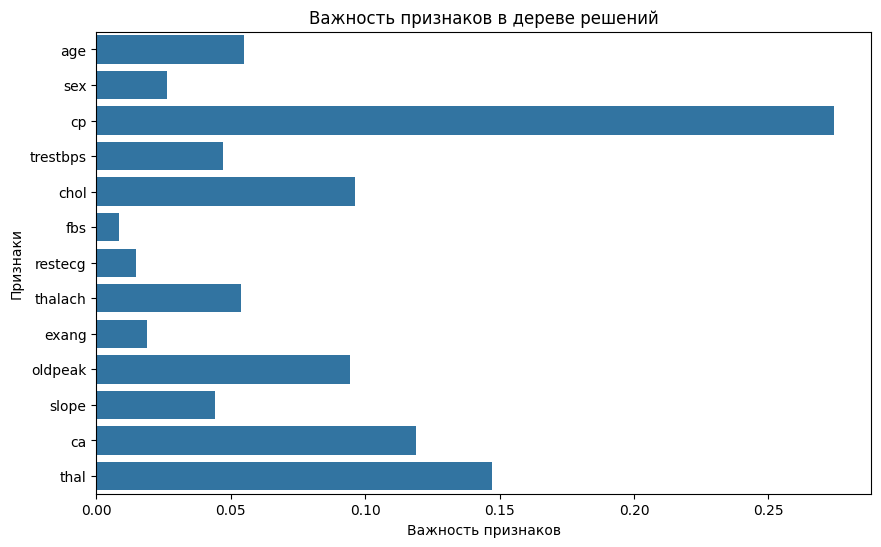

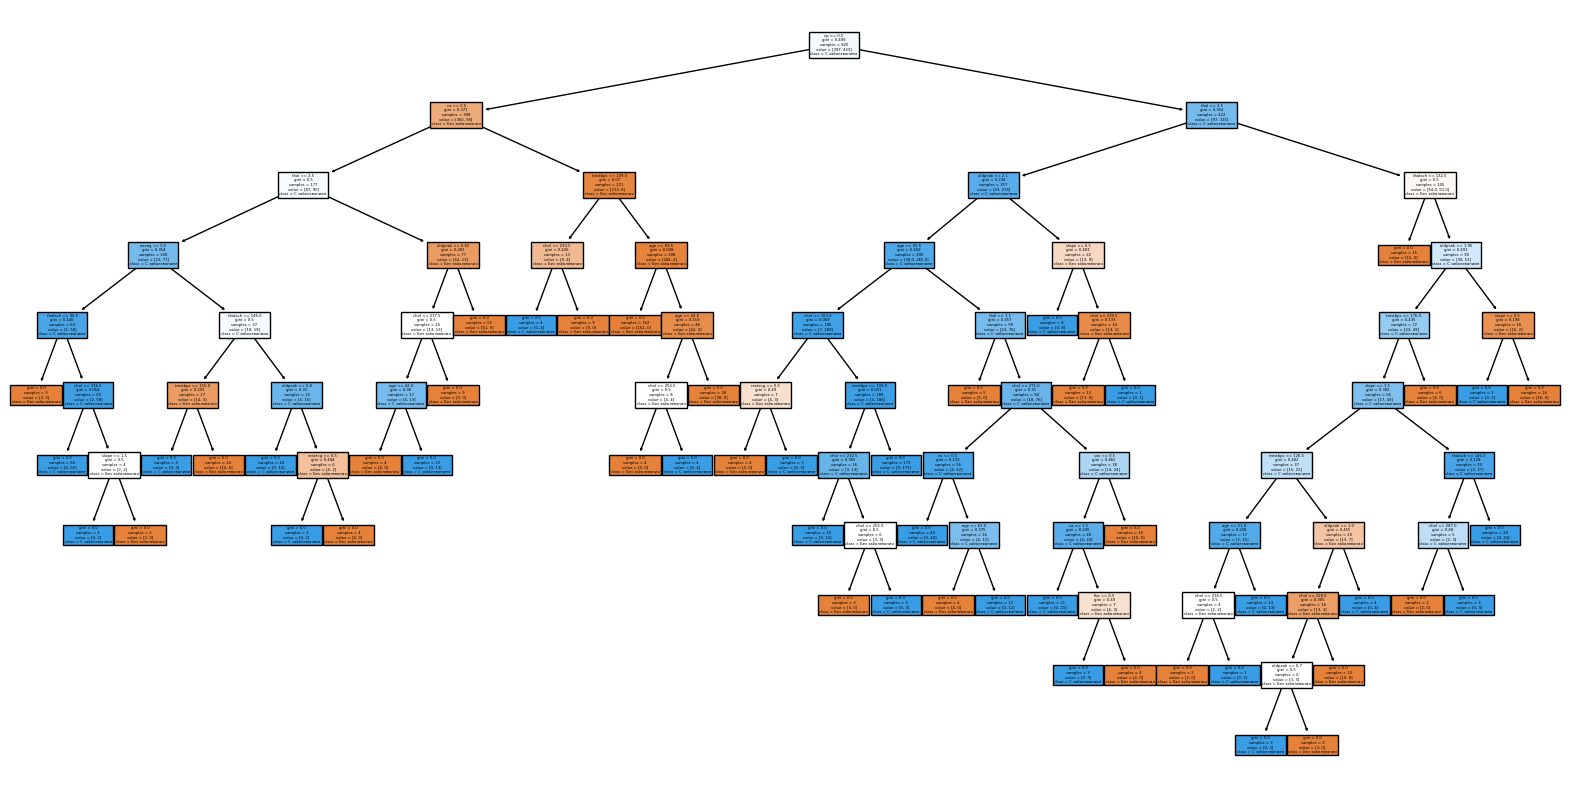

In [27]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Инициализируем модель дерева решений
tree = DecisionTreeClassifier(random_state=42)

# Обучаем модель на обучающих данных
tree.fit(X_train, y_train)

# Важность признаков в дереве решений
prizn =tree.feature_importances_

# Визуализация важности признаков
plt.figure(figsize=(10, 6))
sns.barplot(x=prizn, y=X.columns)
plt.title("Важность признаков в дереве решений")
plt.xlabel("Важность признаков")
plt.ylabel("Признаки")
plt.show()

# Визуализация дерева решений
plt.figure(figsize=(20, 10))
plot_tree(tree, filled=True, feature_names=X.columns, class_names=["Без заболевания", "С заболеванием"])
plt.show()


In [28]:
from sklearn.tree import export_text

# Получение текстового представления правил дерева решений
rules = export_text(tree, feature_names=list(X.columns))

# Вывод текстового представления правил дерева решений
print(rules)


|--- cp <= 0.50
|   |--- ca <= 0.50
|   |   |--- thal <= 2.50
|   |   |   |--- exang <= 0.50
|   |   |   |   |--- thalach <= 96.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- thalach >  96.50
|   |   |   |   |   |--- chol <= 316.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- chol >  316.50
|   |   |   |   |   |   |--- slope <= 1.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- slope >  1.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |--- exang >  0.50
|   |   |   |   |--- thalach <= 146.00
|   |   |   |   |   |--- trestbps <= 115.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- trestbps >  115.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- thalach >  146.00
|   |   |   |   |   |--- oldpeak <= 0.80
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- oldpeak >  0.80
|   |   |   |   |   |   |--- restecg <= 0.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- 

### Случайный лес

In [29]:
from sklearn.ensemble import RandomForestClassifier

# Создание модели случайного леса
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Обучение модели
random_forest_model.fit(X_train, y_train)

# Оценка качества модели
random_forest_accuracy = random_forest_model.score(X_test, y_test)


In [30]:
from sklearn.ensemble import BaggingClassifier
# Создание базовой модели (решающего дерева)
base_model = DecisionTreeClassifier(random_state=42)

# Создание модели бэггинга на основе базовой модели
bagging_model = BaggingClassifier(base_model, n_estimators=10, random_state=42)

# Обучение модели бэггинга на обучающем наборе данных
bagging_model.fit(X_train, y_train)

# Предсказание на тестовом наборе данных
y_pred_bagging = bagging_model.predict(X_test)

# Оценка точности модели бэггинга
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)

### AdaBoost

In [31]:
from sklearn.ensemble import AdaBoostClassifier

# Создание модели AdaBoost
adaboost_model = AdaBoostClassifier(n_estimators=50, random_state=42)

# Обучение модели
adaboost_model.fit(X_train, y_train)

# Оценка качества модели
adaboost_accuracy = adaboost_model.score(X_test, y_test)


C:\Users\Danial\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


### Градиент

In [32]:
from sklearn.ensemble import GradientBoostingClassifier

# Создание модели градиентного бустинга
gradient_boosting_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Обучение модели
gradient_boosting_model.fit(X_train, y_train)

# Оценка качества модели
gradient_boosting_accuracy = gradient_boosting_model.score(X_test, y_test)



In [33]:
from sklearn.metrics import accuracy_score

# Предсказания для модели случайного леса
y_pred_random_forest = random_forest_model.predict(X_test)
random_forest_accuracy = accuracy_score(y_test, y_pred_random_forest)

# Предсказания для модели AdaBoost
y_pred_adaboost = adaboost_model.predict(X_test)
adaboost_accuracy = accuracy_score(y_test, y_pred_adaboost)

# Предсказания для модели градиентного бустинга
y_pred_gradient_boosting = gradient_boosting_model.predict(X_test)
gradient_boosting_accuracy = accuracy_score(y_test, y_pred_gradient_boosting)

# Вывод результатов
print("Accuracy для случайного леса:", random_forest_accuracy)
print("Accuracy для AdaBoost:", adaboost_accuracy)
print("Accuracy для градиентного бустинга:", gradient_boosting_accuracy)
print("Точность модели бэггинга:", accuracy_bagging)


Accuracy для случайного леса: 0.9853658536585366
Accuracy для AdaBoost: 0.8780487804878049
Accuracy для градиентного бустинга: 0.9317073170731708
Точность модели бэггинга: 0.9853658536585366


# ЛАБ№6

In [34]:
X = data.drop(columns='target')
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# Определение базовых моделей для стекинга
base_learners = [
    ('decision_tree', DecisionTreeClassifier()),
    ('svm', SVC(probability=True))
]
# Определение мета-модели
meta_model = LogisticRegression()
# Создание модели стекинга
stacking_clf = StackingClassifier(estimators=base_learners, final_estimator=meta_model)
# Обучение модели стекинга
stacking_clf.fit(X_train, y_train)
# Предсказание на тестовой выборке
y_pred = stacking_clf.predict(X_test)
# Оценка точности модели
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9853658536585366

In [36]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Создание модели MLP
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Компиляция модели
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Обучение модели
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Оценка модели
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Оценка точности модели
accuracy = accuracy_score(y_test, y_pred)

accuracy

C:\Users\Danial\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.5902 - loss: 0.6287 - val_accuracy: 0.7805 - val_loss: 0.5501
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8490 - loss: 0.4610 - val_accuracy: 0.8110 - val_loss: 0.4861
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8544 - loss: 0.3740 - val_accuracy: 0.8232 - val_loss: 0.4530
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9003 - loss: 0.3081 - val_accuracy: 0.8232 - val_loss: 0.4364
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8741 - loss: 0.3175 - val_accuracy: 0.8354 - val_loss: 0.4238
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9229 - loss: 0.2530 - val_accuracy: 0.8354 - val_loss: 0.4238
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9144 - loss: 0.2556 - val_accuracy: 0.8354 - val_loss: 0.4182
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9154 - loss: 0.2357 - val_accuracy: 0.8537 - val_loss

0.9463414634146341